In [231]:
import numpy as n
import pandas as pd
import matplotlib.pyplot as plt

In [232]:
calendar = pd.read_csv('calendar.csv')
listing = pd.read_csv('listings.csv')
review = pd.read_csv('reviews.csv')

In [234]:
print(calendar.shape)
print(listing.shape)
print(review.shape)

(2880215, 7)
(7891, 106)
(235843, 6)


In [3]:
# subset the interested columns from the listings
subsets = ['id', 'neighbourhood_cleansed','host_is_superhost',
           'neighbourhood','zipcode','latitude','longitude','property_type','room_type',
          'accommodates','bathrooms','bedrooms','beds','bed_type', 'price',
          'weekly_price','monthly_price','minimum_nights',
          'number_of_reviews','first_review',
           'last_review', 'review_scores_rating','cancellation_policy',
          'amenities','reviews_per_month']

list_sub = listing[subsets]
list_sub = list_sub.rename(columns = {'id': 'listing_id', 'price':'price_list'}) # rename id column

In [4]:
review_sub = review[['listing_id','date']] # subset review
calendar_sub = calendar[['listing_id','date','available','price']] # subset calendar
calendar_sub = calendar_sub.rename(columns = {'price':'price_cal'}) # rename price column

In [5]:
#### change the price format(i.e. $1,000.00 to 1000.00)
price_cal = np.array([calendar_sub['price_cal'][i].replace(',','').lstrip('$') 
                                     for i in range(calendar_sub.shape[0])])
price_cal = price_cal.astype('float')

price_list = np.array([list_sub['price_list'][i].replace(',','').lstrip('$')
                      for i in range(list_sub.shape[0])])
price_list = price_list.astype('float')

In [6]:
### replace the changed price column
list_sub['price_list'] = price_list
calendar_sub['price_cal'] = price_cal

In [7]:
# calculate the averge price_cal for each listing_id
calendar_ave_price = np.round(calendar_sub.groupby('listing_id').mean(), decimals=0)
calendar_ave_price = calendar_ave_price.reset_index()
calendar_ave_price

,listing_id,price_cal
0,4952,100.0
1,11464,85.0
2,21373,54.0
3,40560,110.0
4,44648,52.0
...,...,...
7886,42916184,60.0
7887,42925802,197.0
7888,42926879,45.0
7889,42929090,99.0


In [8]:
merged = pd.merge(list_sub, calendar_ave_price, on= 'listing_id')

In [9]:
## add price change as a new column
price_change = np.round((merged['price_cal']-merged['price_list'])/merged['price_list'], decimals=2)

merged['price_change'] = price_change

In [10]:
merged[['listing_id','neighbourhood_cleansed',
        'host_is_superhost','latitude',
        'longitude','property_type','room_type',
          'accommodates','bathrooms','bedrooms',
        'beds','price_list','price_cal','price_change']]

,listing_id,neighbourhood_cleansed,host_is_superhost,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price_list,price_cal,price_change
0,4952,Palo Alto,t,37.439720,-122.156720,Villa,Private room,2,2.0,1.0,1.0,90.0,100.0,0.11
1,11464,Santa Clara,f,37.343420,-121.988290,Apartment,Entire home/apt,1,1.0,NaN,1.0,85.0,85.0,0.00
2,21373,Palo Alto,t,37.440010,-122.156670,Villa,Private room,1,2.0,1.0,1.0,99.0,54.0,-0.45
3,40560,Palo Alto,t,37.453560,-122.137330,House,Private room,2,1.0,1.0,1.0,110.0,110.0,0.00
4,44648,San Jose,f,37.326540,-121.949550,House,Private room,1,1.0,1.0,1.0,60.0,52.0,-0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7886,42916184,San Jose,f,37.319840,-121.980260,Apartment,Entire home/apt,4,1.0,1.0,1.0,60.0,60.0,0.00
7887,42925802,Santa Clara,f,37.342100,-121.967860,Apartment,Entire home/apt,7,2.0,2.0,3.0,197.0,197.0,0.00
7888,42926879,Los Altos,f,37.369260,-122.097130,House,Shared room,10,1.5,1.0,4.0,45.0,45.0,0.00
7889,42929090,Milpitas,f,37.408900,-121.894695,Apartment,Entire home/apt,5,2.0,2.0,2.0,99.0,99.0,0.00


In [11]:
# change date format in the review data set

review_date = pd.to_datetime(review_sub['date'])

review_sub['date'] = review_date
review_sub['date'][0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Timestamp('2009-08-02 00:00:00')

In [12]:
# Indexing by Time, choose 2018 and 2019 review for each listing_id
index = pd.DatetimeIndex(review_sub['date'])
data = pd.Series(list(review_sub['listing_id']), index = index)
review_2018 = data['2018']
review_2019 = data['2019']

In [13]:
review_2018_unique_listing = [list(review_2018.values).count(i) for i in merged['listing_id']]
review_2019_unique_listing = [list(review_2019.values).count(i) for i in merged['listing_id']]

In [14]:
merged['review_number_2018'] = review_2018_unique_listing # add review number in 2018 to merged set
merged['review_number_2019'] = review_2019_unique_listing # add review number in 2019 to merged set
merged_update = merged.set_index('listing_id') # set the index as listing_id

In [15]:
# check the rows with error in the price in listing and calendar

idd = [13898119, 17072025,19179484, 22196090,26044137,30254601,30858661,
 31421551,34234496,34234507,35808634,36261079,36943224,37918676,
39175128,39605852,39690862,40805383,4332383,11033056]

error_price = merged_update.loc[idd][['neighbourhood_cleansed','property_type',
                       'room_type','price_list','price_cal',
                       'price_change','accommodates']] # rows with error in price
# correct the price error
merged_update.loc[13898119, 'price_cal'] = 50  
merged_update.loc[17072025,'price_list'] = 790
merged_update.loc[19179484,'price_cal'] = 75
merged_update.loc[22196090,'price_cal'] = 70
merged_update.loc[26044137,'price_list'] = 100
merged_update.loc[30254601,'price_list'] = 110
merged_update.loc[30858661,'price_cal'] = 200
merged_update.loc[31421551,'price_cal'] = 200
merged_update.loc[34234496,'price_cal'] = 200
merged_update.loc[34234507,'price_cal'] = 200
merged_update.loc[35808634,'price_list'] = 150
merged_update.loc[36261079,'price_cal'] = 99.7
merged_update.loc[37918676,'price_list'] = 120
merged_update.loc[39175128,'price_cal'] = 22.22
merged_update.loc[39605852,'price_cal'] = 22.22
merged_update.loc[40805383,'price_list'] = 100
merged_update.loc[4332383,'price_list'] = 29
merged_update.loc[11033056,'price_list'] = 170

price_change = np.round((merged_update['price_cal']-merged_update['price_list'])/merged_update['price_list'], decimals=2)

merged_update['price_change'] = price_change


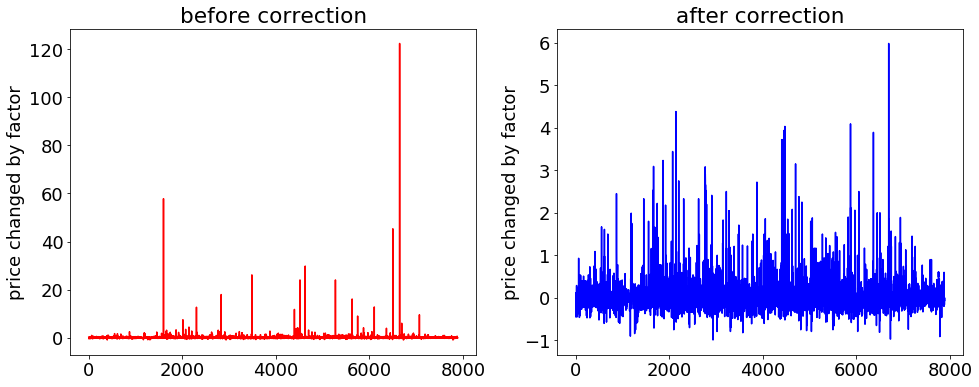

In [189]:
# # plot the price change and identify the extreme values
fig,ax = plt.subplots(1,2, figsize = (16,6))


ax[0].plot(merged['price_change'], color = 'red')
ax[1].plot(np.arange(7891), merged_update['price_change'], color = 'blue')

titles = ['before correction', 'after correction']
for i in range(2):
    ax[i].set_ylabel('price changed by factor')
    ax[i].set_title(titles[i])

fig.savefig('price_correction.png',bbox_inches="tight")
plt.show()

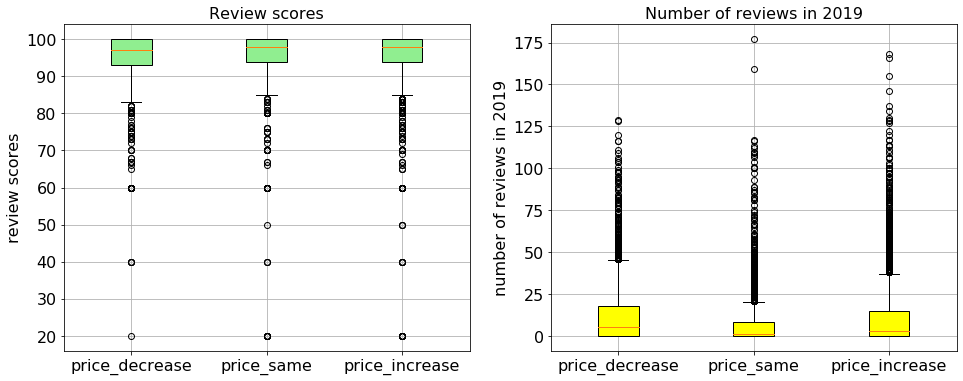

In [190]:
# create side-by-side boxplot: price_change >0 vs price_change ==0 vs price_change >0b

# review_score_rating and number of review in 2019

price_increase = merged_update[merged_update['price_change'] > 0]
review_two_year_increase = price_increase['review_number_2018'] + price_increase['review_number_2019']

price_decrease = merged_update[merged_update['price_change'] < 0]
review_two_year_decrease = price_decrease['review_number_2018'] + price_decrease['review_number_2019']


price_same = merged_update[merged_update['price_change'] == 0]
review_two_year_same = price_same['review_number_2018'] + price_same['review_number_2019']

fig,ax = plt.subplots(1,2, figsize = (16,6))

ax[0].boxplot([price_decrease['review_scores_rating'][~np.isnan(price_decrease['review_scores_rating'])],
               price_same['review_scores_rating'][~np.isnan(price_same['review_scores_rating'])],
               price_increase['review_scores_rating'][~np.isnan(price_increase['review_scores_rating'])]],
              patch_artist=True, boxprops=dict(facecolor='lightgreen', color='black'))
ax[0].set_ylabel('review scores', fontsize = 16)
ax[0].set_title('Review scores', fontsize = 16)

ax[1].boxplot([price_decrease['review_number_2019'], 
               price_same['review_number_2019'],
               price_increase['review_number_2019']],
             patch_artist=True, boxprops=dict(facecolor='yellow', color='black'))
ax[1].set_ylabel('number of reviews in 2019', fontsize = 16)
ax[1].set_title('Number of reviews in 2019', fontsize =16)


for i in range(2):
    ax[i].grid()
    ax[i].set_xticklabels(['price_decrease','price_same',
                           'price_increase'], fontsize = 16)
    ax[i].tick_params(axis = 'both', which = 'major', labelsize = 16)

fig.savefig('boxplot_review_vs_price_change.pdf',bbox_inches="tight")

,lower whisker,25th,median,75th,upper whisker
price decrease,83.0,93.0,97.0,100.0,100.0
price same,85.0,94.0,98.0,100.0,100.0
price increase,85.0,94.0,98.0,100.0,100.0


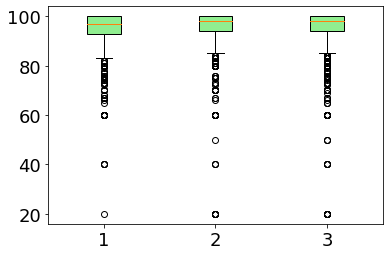

In [220]:
# summary statistics of the review scores for the 3 groups
B = plt.boxplot([price_decrease['review_scores_rating'][~np.isnan(price_decrease['review_scores_rating'])],
               price_same['review_scores_rating'][~np.isnan(price_same['review_scores_rating'])],
               price_increase['review_scores_rating'][~np.isnan(price_increase['review_scores_rating'])]],
              patch_artist=True, boxprops=dict(facecolor='lightgreen', color='black'))

[item.get_ydata() for item in B['whiskers']]
[item.get_ydata()[1] for item in B['whiskers']]

# exclude NA from the review scores for each price group
price_decrease_wtNA = price_decrease['review_scores_rating'][~np.isnan(
    price_decrease['review_scores_rating'])]
price_same_wtNA = price_same['review_scores_rating'][~np.isnan(
    price_same['review_scores_rating'])]
price_increase_wtNA = price_increase['review_scores_rating'][~np.isnan(
    price_increase['review_scores_rating'])]

median = [np.median(i) for i in [price_decrease_wtNA, price_same_wtNA, price_increase_wtNA]]
lower25 = [np.percentile(i, 25) for i in [price_decrease_wtNA, price_same_wtNA, price_increase_wtNA]]
upper75 = [np.percentile(i, 75) for i in [price_decrease_wtNA, price_same_wtNA, price_increase_wtNA]]
w = [item.get_ydata()[1] for item in B['whiskers']]

lower_w = w[::2]
upper_w = w[1::2]

# create a dataframe for the summary statistics
review_summary = pd.DataFrame({'lower whisker': lower_w, '25th': lower25, 
                               'median': median, '75th': upper75, 
                               'upper whisker':upper_w})

index = np.array(['price decrease', 'price same', 'price increase']) # rename the index
review_summary.set_index(index)


,lower whisker,25th,median,75th,upper whisker
price decrease,0.0,0.0,5.0,18.0,45.0
price same,0.0,0.0,1.0,8.0,20.0
price increase,0.0,0.0,3.0,15.0,37.0


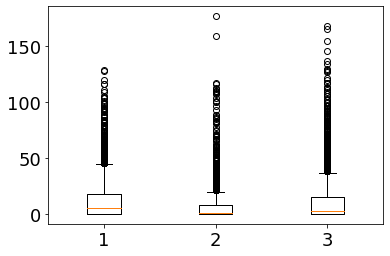

In [224]:
# summary statistics of the number of the reviews in 2019 for the 3 groups
C = plt.boxplot([price_decrease['review_number_2019'], 
               price_same['review_number_2019'],
               price_increase['review_number_2019']])
[item.get_ydata() for item in C['whiskers']]
[item.get_ydata()[1] for item in C['whiskers']]

median = [np.median(i) for i in [price_decrease['review_number_2019'], 
               price_same['review_number_2019'],
               price_increase['review_number_2019']]]
lower25 = [np.percentile(i, 25) for i in [price_decrease['review_number_2019'], 
               price_same['review_number_2019'],
               price_increase['review_number_2019']]]
upper75 = [np.percentile(i, 75) for i in [price_decrease['review_number_2019'], 
               price_same['review_number_2019'],
               price_increase['review_number_2019']]]
w = [item.get_ydata()[1] for item in C['whiskers']]

lower_w = w[::2]
upper_w = w[1::2]

# create a dataframe for the summary statistics
review_summary = pd.DataFrame({'lower whisker': lower_w, '25th': lower25, 
                               'median': median, '75th': upper75, 
                               'upper whisker':upper_w})

index = np.array(['price decrease', 'price same', 'price increase']) # rename the index
review_summary.set_index(index)



0.7291941875825627
0.5202354672553348
1.1958904109589041


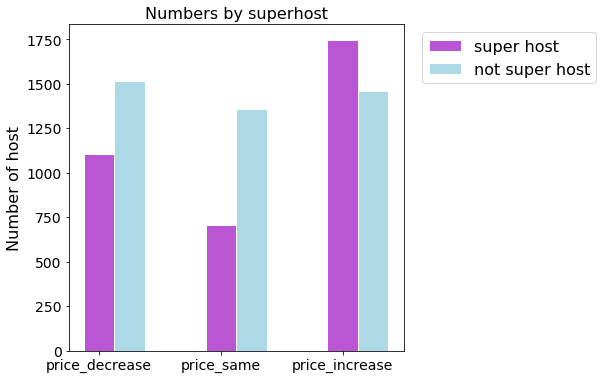

In [230]:
# super host vs. not super host in price decrease and price increase groups
super_host_decrease = list(price_decrease['host_is_superhost']).count('t')
not_super_host_decrease = list(price_decrease['host_is_superhost']).count('f')

super_host_same = list(price_same['host_is_superhost']).count('t')
not_super_host_same = list(price_same['host_is_superhost']).count('f')

super_host_increase = list(price_increase['host_is_superhost']).count('t')
not_super_host_increase = list(price_increase['host_is_superhost']).count('f')


fig = plt.figure(figsize = (6,6))
ax = plt.axes()

# set width of bar
barWidth = 0.25

# set the height of bar
bars1 = [super_host_decrease, super_host_same, super_host_increase]
bars2 = [not_super_host_decrease, not_super_host_same, not_super_host_increase]

# set position of bar on X axis
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]

# make the plot

ax.bar(r1, bars1, color ='mediumorchid', width = barWidth,edgecolor = 'white', label = 'super host')
ax.bar(r2, bars2, color = 'lightblue', width = barWidth, edgecolor = 'white', label = 'not super host')

ax.set_xticks(np.arange(3))
ax.set_xticklabels(['price_decrease','price_same','price_increase'])
ax.legend(fontsize = 16,bbox_to_anchor=(1.6, 1), loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylabel('Number of host', fontsize = 16)
ax.set_title('Numbers by superhost', fontsize = 16)

fig.savefig('barplot_superhost_price_change.pdf',bbox_inches="tight")
print(super_host_decrease/not_super_host_decrease)
print(super_host_same/not_super_host_same)
print(super_host_increase/not_super_host_increase)

In [37]:
# Percent of each property type in price decrease group
property_type_d = price_decrease['property_type'].unique()

total_property_type_d =np.array([price_decrease[price_decrease['property_type']==i].shape[0] 
                               for i in property_type_d])/price_decrease.shape[0]

property_decrease_order = property_type_d[np.argsort(total_property_type_d)[::-1]]
property_decrease_percent= total_property_type_d[np.argsort(total_property_type_d)[::-1]]


In [68]:
# Percent of each property type in same price group
property_type_s = price_same['property_type'].unique()

total_property_type_s =np.array([price_same[price_same['property_type']==i].shape[0] 
                               for i in property_type_s])/price_same.shape[0]

property_same_order = property_type_s[np.argsort(total_property_type_s)[::-1]]
property_same_percent= total_property_type_s[np.argsort(total_property_type_s)[::-1]]

In [69]:
# percent of each property type in price increase group
property_type_i = price_increase['property_type'].unique()

total_property_type_i =np.array([price_increase[price_increase['property_type']==i].shape[0] 
                               for i in property_type_i])/price_increase.shape[0]

property_increase_order = property_type_i[np.argsort(total_property_type_i)[::-1]]
property_increase_percent = total_property_type_i[np.argsort(total_property_type_i)[::-1]]

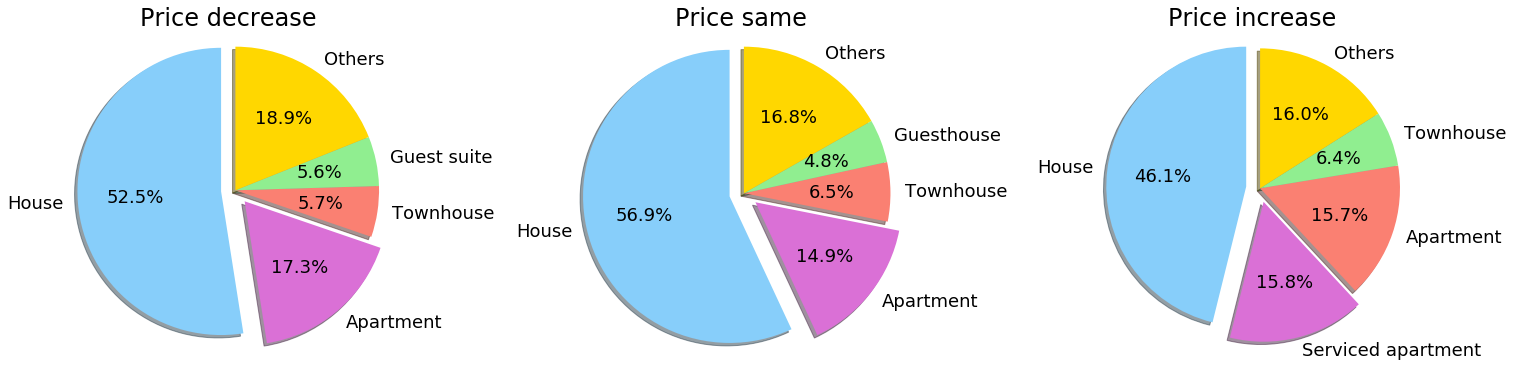

In [131]:
# Pie plot showing the percentages in price decrease and increase groups

labels_d = 'House','Apartment','Townhouse','Guest suite','Others'

sizes_d = [property_decrease_percent[0],property_decrease_percent[1],
        property_decrease_percent[2],property_decrease_percent[3],
         1-np.sum(property_decrease_percent[0:4])]

labels_s = 'House', 'Apartment', 'Townhouse', 'Guesthouse', 'Others'
sizes_s = [property_same_percent[0],property_same_percent[1],
        property_same_percent[2],property_same_percent[3],
         1-np.sum(property_same_percent[0:4])]

labels_i = 'House','Serviced apartment','Apartment','Townhouse','Others'
sizes_i = [property_increase_percent[0],property_increase_percent[1],
        property_increase_percent[2],property_increase_percent[3],
         1-np.sum(property_increase_percent[0:4])]

fig,ax = plt.subplots(1,3, figsize = (26,6))

plt.rcParams['font.size'] = 18

explode = (0.1,0.1, 0,0,0)
colors = ['lightskyblue', 'orchid', 'salmon', 'lightgreen', 'gold']

ax[0].pie(sizes_d, explode = explode, labels = labels_d,
         autopct='%1.1f%%',colors = colors,
        shadow=True, startangle=90)
ax[0].axis('equal')
ax[0].set_title('Price decrease', fontsize = 24)

ax[1].pie(sizes_s, explode = explode, labels = labels_s,
         autopct='%1.1f%%',colors = colors,
        shadow=True, startangle=90)
ax[1].axis('equal')
ax[1].set_title('Price same', fontsize = 24)

ax[2].pie(sizes_i, explode = explode, labels = labels_i,
       autopct='%1.1f%%',colors = colors,
        shadow=True, startangle=90)
ax[2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[2].set_title('Price increase', fontsize = 24)

plt.show()

fig.savefig("pieplot_property_type_price_change.pdf",bbox_inches="tight")

In [78]:
items_price_increase = price_increase['amenities']
items_price_decrease = price_decrease['amenities']
items_price_same = price_same['amenities']

clean_amenities_decrease = []
for thing in items_price_decrease:
    thing = thing.strip()
    thing = thing.replace('"','')
    thing = thing.replace('{','')
    thing = thing.replace('}','')
    clean_amenities_decrease.append(thing)

    
clean_amenities_same = []
for thing in items_price_same:
    thing = thing.strip()
    thing = thing.replace('"','')
    thing = thing.replace('{','')
    thing = thing.replace('}','')
    clean_amenities_same.append(thing)

clean_amenities_increase = []
for thing in items_price_increase:
    thing = thing.strip()
    thing = thing.replace('"','')
    thing = thing.replace('{','')
    thing = thing.replace('}','')
    clean_amenities_increase.append(thing)

In [120]:
# save the cleaned data
merged_update.to_csv("output.csv")

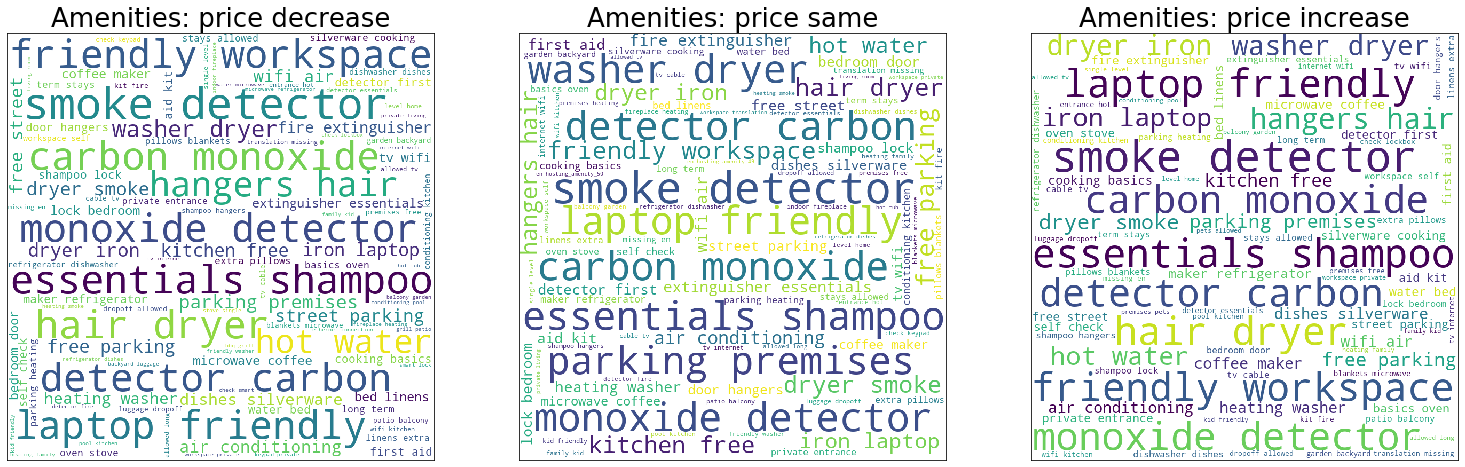

In [132]:

# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
 
#####price decrease  
comment_words_decrease = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the amentities list
for val in clean_amenities_decrease: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words_decrease += " ".join(tokens)+" "
    
wordcloud_decrease = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words_decrease) 

 
#####price same 
comment_words_same = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the amentities list
for val in clean_amenities_same: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words_same += " ".join(tokens)+" "
    
wordcloud_same = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words_same) 

#######price increase    
comment_words_increase = '' 

for val in clean_amenities_increase: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words_increase += " ".join(tokens)+" "
    
wordcloud_increase = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words_increase) 
  
# plot the WordCloud image

fig, ax = plt.subplots(1,3, figsize = (26,8), facecolor = None)
wordcloud_groups = [wordcloud_decrease, wordcloud_same,wordcloud_increase]
titles = ['Amenities: price decrease',
          'Amenities: price same',
         'Amenities: price increase']

for i in range(3):
    ax[i].imshow(wordcloud_groups[i]) 
    ax[i].set_title(titles[i], fontsize = 26)
    ax[i].tick_params(
    axis='both',          # changes apply to both
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left = False,
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft = False)
    
plt.show() 

fig.savefig("worldcloud.pdf",bbox_inches="tight")

In [30]:
import plotly.express as px
import geopandas as gpd
import pyproj
from shapely.geometry import Point, Polygon
import descartes

In [31]:
file = '/Users/yitang/Dropbox/Spring2020_SJSU/MATH_167PS/Project/AirBnBData/LandPolygon/geo_export_755ef61b-513a-4dd0-8dea-833cd01aafd3.shp'

In [32]:
map_df = gpd.read_file(file)
map_df.head()

,apn,number_of_,objectid,shape_area,shape_leng,situs_city,situs_hous,situs_ho_2,situs_stat,situs_stre,situs_st_2,situs_st_3,situs_unit,situs_zip_,tax_rate_a,geometry
0,69508001,1.0,307481.0,1057.231569,129.329215,SAN JOSE,743,None,CA,None,DUBANSKI,DR,None,95123-4514,17108.0,"POLYGON ((-121.846017002438 37.236740532044, -..."
1,59123011,1.0,76391.0,884.647549,122.894890,SAN JOSE,2733,None,CA,None,HELMSLEY,DR,None,95132-2915,17010.0,"POLYGON ((-121.857014197011 37.38744575416, -1..."
2,28829041,1.0,227109.0,1862.568094,174.979486,SAN JOSE,1751,None,CA,None,CAMPBELL,AV,None,95125-5508,17018.0,"POLYGON ((-121.916944506182 37.287274264356, -..."
3,23719033,1.0,137568.0,58997.929846,1036.931839,SAN JOSE,2165,None,CA,None,O'TOOLE,AV,None,95131,17066.0,"POLYGON ((-121.909460956859 37.394741236043, -..."
4,34208019,1.0,253785.0,1528.195996,158.969180,LOS ALTOS,1210,None,CA,None,MONTCLAIRE,WY,None,94024,11000.0,"POLYGON ((-122.084255294862 37.348832216353, -..."


In [33]:
def make_point(row):
    return Point(row.longitude, row.latitude)

points = merged_update.apply(make_point, axis = 1)
crs = {'init': 'epsg:4326'}

price_change_location = gpd.GeoDataFrame(merged_update,
                                         crs = crs,
                                         geometry = points)

price_change_location.head()

,neighbourhood_cleansed,host_is_superhost,neighbourhood,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,last_review,review_scores_rating,cancellation_policy,amenities,reviews_per_month,price_cal,price_change,review_number_2018,review_number_2019,geometry
listing_id,,,,,,,,,,,,,,,,,,,,,
4952,Palo Alto,t,Palo Alto,94301,37.43972,-122.15672,Villa,Private room,2,2.0,...,2019-01-12,96.0,moderate,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",0.58,100.0,0.11,5,1,POINT (-122.15672 37.43972)
11464,Santa Clara,f,Santa Clara,95051,37.34342,-121.98829,Apartment,Entire home/apt,1,1.0,...,2019-10-11,87.0,moderate,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",0.09,85.0,0.00,2,1,POINT (-121.98829 37.34342)
21373,Palo Alto,t,Palo Alto,94301,37.44001,-122.15667,Villa,Private room,1,2.0,...,2020-03-14,97.0,moderate,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",2.21,54.0,-0.45,75,46,POINT (-122.15667 37.44001)
40560,Palo Alto,t,Palo Alto,94301,37.45356,-122.13733,House,Private room,2,1.0,...,2019-11-21,98.0,moderate,"{TV,""Cable TV"",Internet,Wifi,""Pets live on thi...",1.15,110.0,0.00,23,10,POINT (-122.13733 37.45356)
44648,San Jose,f,Santa Clara,95117,37.32654,-121.94955,House,Private room,1,1.0,...,2020-02-20,91.0,moderate,"{TV,Wifi,""Free parking on premises"",""Pets live...",0.57,52.0,-0.13,6,7,POINT (-121.94955 37.32654)


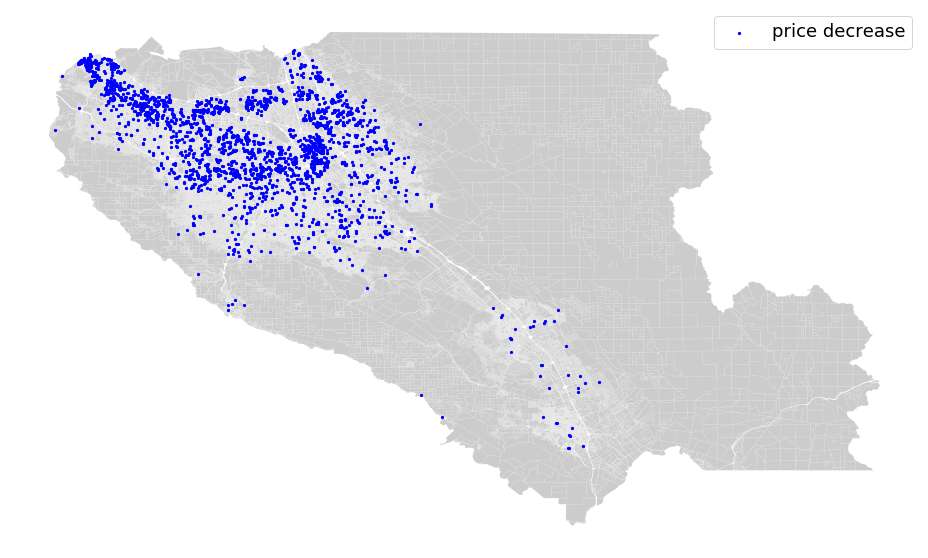

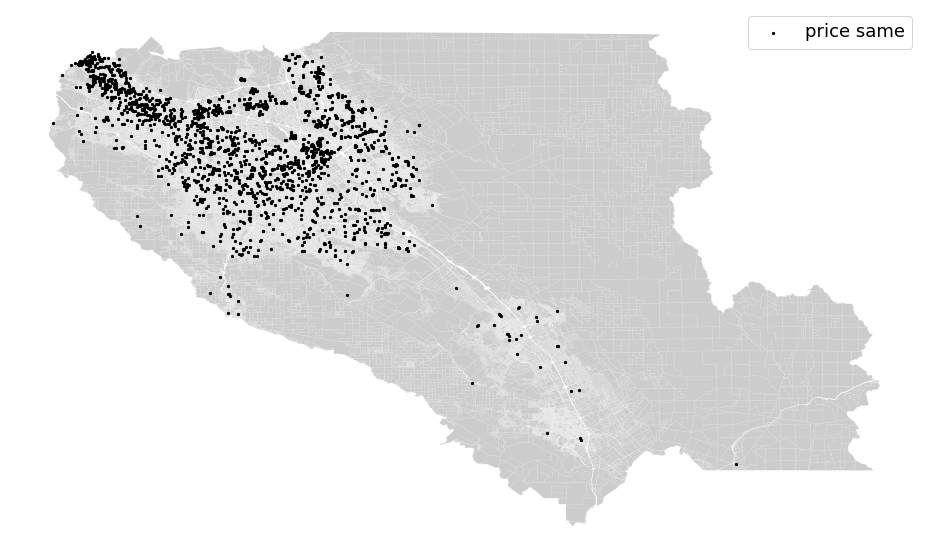

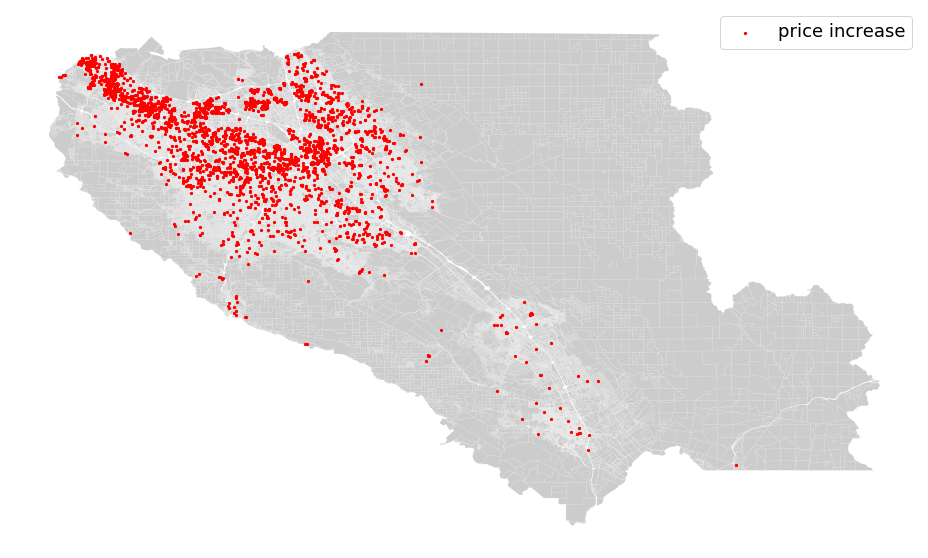

In [142]:

ax[0] = map_df.plot(linewidth = 0.25,figsize = (20, 10),
                    alpha = 0.4,edgecolor = 'white', color = 'gray')
price_change_location[price_change_location['price_change'] < 0].plot(markersize = 5, ax = ax[0],
                                                                     color = 'blue', marker = 'o',
                                                                     label = 'price decrease')

ax[1] = map_df.plot(linewidth = 0.25,figsize = (20, 10),
                    alpha = 0.4,edgecolor = 'white', color = 'gray')
price_change_location[price_change_location['price_change'] == 0].plot(markersize = 5, ax = ax[1],
                                                                     color = 'black', marker = 'o',
                                                                     label = 'price same')


ax[2] = map_df.plot(linewidth = 0.25,figsize = (20, 10),
                    alpha = 0.4,edgecolor = 'white', color = 'gray')
price_change_location[price_change_location['price_change'] > 0].plot(markersize = 5, ax = ax[2],
                                                                     color = 'red', marker = 'o',
                                                                     label = 'price increase')
for i in range(3):
    ax[i].legend(fontsize = 18)
    ax[i].axis('off')

# fig.savefig("maps.pdf")

In [143]:
ax[0].figure.savefig("price_decrease_map.png",bbox_inches="tight")
ax[1].figure.savefig("price_same_map.png",bbox_inches="tight")
ax[2].figure.savefig("price_increase_map.png",bbox_inches="tight")

In [55]:
### Initially I tried to do choropleth maps,first I have to dissolve the small polygons in the same city to form
### a single large polygon of a city. But the map doesn't seem correct. So I just played the following 
### this for fun. 
sc_boundary = map_df[['situs_city','geometry']]
new_boundary = sc_boundary.dissolve(by = 'situs_city')

In [56]:
new_boundary

,geometry
situs_city,
ALVISO,"(POLYGON ((-121.966156740814 37.425340584684, ..."
CAMPBELL,"(POLYGON ((-121.968329610078 37.270553856693, ..."
COYOTE,"(POLYGON ((-121.718679694309 37.196722256, -12..."
CUPERTINO,"(POLYGON ((-122.069801931946 37.308599693358, ..."
GILROY,"(POLYGON ((-121.41726320416 36.961530074416, -..."
LOS ALTOS,"(POLYGON ((-122.082695258081 37.350311829232, ..."
LOS ALTOS HILLS,"(POLYGON ((-122.089896519013 37.313964090792, ..."
LOS GATOS,"(POLYGON ((-121.974267526208 37.142273695073, ..."
MILPITAS,"(POLYGON ((-121.915066305891 37.402223164732, ..."


(-122.25231833451124,
 -121.16195807122776,
 36.863450230856344,
 37.514099214448656)

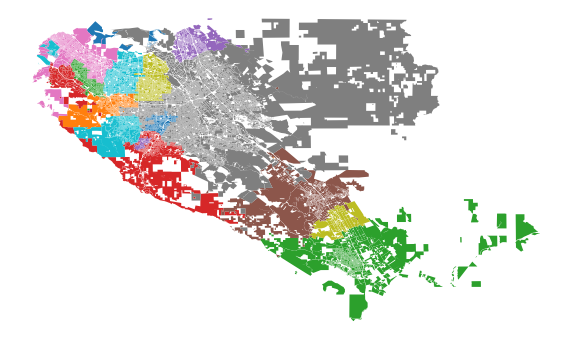

In [57]:
fig, ax = plt.subplots(figsize = (10,6))

new_boundary.reset_index().plot(column = 'situs_city', ax = ax)

ax.set_axis_off()
plt.axis('equal')

In [72]:
new_boundary.reset_index(inplace = True)

In [167]:
new_boundary

,situs_city,geometry
0,ALVISO,"(POLYGON ((-121.966156740814 37.425340584684, ..."
1,CAMPBELL,"(POLYGON ((-121.968329610078 37.270553856693, ..."
2,COYOTE,"(POLYGON ((-121.718679694309 37.196722256, -12..."
3,CUPERTINO,"(POLYGON ((-122.069801931946 37.308599693358, ..."
4,GILROY,"(POLYGON ((-121.41726320416 36.961530074416, -..."
5,LOS ALTOS,"(POLYGON ((-122.082695258081 37.350311829232, ..."
6,LOS ALTOS HILLS,"(POLYGON ((-122.089896519013 37.313964090792, ..."
7,LOS GATOS,"(POLYGON ((-121.974267526208 37.142273695073, ..."
8,MILPITAS,"(POLYGON ((-121.915066305891 37.402223164732, ..."
9,MONTE SERENO,"(POLYGON ((-121.978797139993 37.23804110693, -..."


In [166]:

price_change_city = merged_update[['neighbourhood_cleansed',
                                      'price_change']].groupby('neighbourhood_cleansed').mean()
price_change_city.reset_index(inplace = True)

citys = [price_change_city['neighbourhood_cleansed'][i].upper() for i in range(16)]
price_change_city = price_change_city.rename(columns = {'neighbourhood_cleansed': 'situs_city'})
price_change_city['situs_city']=citys
price_change_city

,situs_city,price_change
0,CAMPBELL,0.063433
1,CUPERTINO,0.023894
2,GILROY,0.151304
3,LOS ALTOS,0.012222
4,LOS ALTOS HILLS,-0.007885
5,LOS GATOS,0.002262
6,MILPITAS,0.040269
7,MONTE SERENO,0.041333
8,MORGAN HILL,-0.002250
9,MOUNTAIN VIEW,0.099456


In [170]:
new = new_boundary.merge(price_change_city, on = 'situs_city', how = 'left')

In [171]:
new

,situs_city,geometry,price_change
0,ALVISO,"(POLYGON ((-121.966156740814 37.425340584684, ...",NaN
1,CAMPBELL,"(POLYGON ((-121.968329610078 37.270553856693, ...",0.063433
2,COYOTE,"(POLYGON ((-121.718679694309 37.196722256, -12...",NaN
3,CUPERTINO,"(POLYGON ((-122.069801931946 37.308599693358, ...",0.023894
4,GILROY,"(POLYGON ((-121.41726320416 36.961530074416, -...",0.151304
5,LOS ALTOS,"(POLYGON ((-122.082695258081 37.350311829232, ...",0.012222
6,LOS ALTOS HILLS,"(POLYGON ((-122.089896519013 37.313964090792, ...",-0.007885
7,LOS GATOS,"(POLYGON ((-121.974267526208 37.142273695073, ...",0.002262
8,MILPITAS,"(POLYGON ((-121.915066305891 37.402223164732, ...",0.040269
9,MONTE SERENO,"(POLYGON ((-121.978797139993 37.23804110693, -...",0.041333


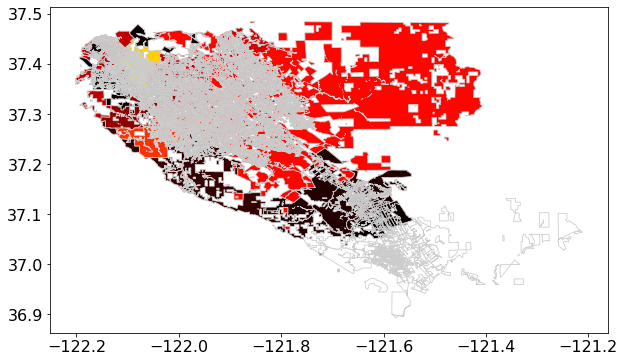

In [176]:
variable = 'price_change'

vmin, vmax = -0.01, 0.2
fig, ax = plt.subplots(1, figsize = (10,6))

new.plot(column = variable, cmap = 'hot', linewidth = 0.8, ax = ax,
        edgecolor = '0.8')